# Improving Neural Networks
![download (5)](https://user-images.githubusercontent.com/50156227/205615241-9b18505c-5f27-46e8-a98d-8edbd8d0403f.gif)


![download](https://github.com/zementalist/temp/assets/50156227/ed97b570-99aa-40e2-87cf-bd240ee02e2a)


# Numerical Example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.e ** -z)

![Screenshot_1](https://github.com/zementalist/temp/assets/50156227/cd807f4b-302f-45d0-a201-f99bbb5cd65e)


In [ ]:
X = np.array([1, 5, 1])
Y = np.array([0, 1])

# Weights from layer 1 (input) to layer 2
W12 = np.array([
    [0.1, 0.2, 0.3],
    [0.4, 0.5, 0.6],
    [0.1, 0.1, 0.1]
])

W23 = np.array([
    [0.3, 0.3],
    [0.4, 0.4],
    [0.5, 0.5],
    [0.2, 0.2]
])

lr = 5

losses = []

# Output of Layer 2

In [ ]:
Z2 = np.dot(W12.T, X)
print("Z2 -> ", Z2)

A2 = sigmoid(Z2)
print("A2 -> ", A2)

A2 = np.append(A2, 1)

Z2 ->  [2.2 2.8 3.4]
A2 ->  [0.90024951 0.94267582 0.96770454]


![download](https://github.com/zementalist/temp/assets/50156227/527b3193-9cac-403b-b1c1-6ecf1dae8fe9)


# Output of layer 3

In [ ]:
Z3 = np.dot(W23.T, A2)
print("Z3 -> ", Z3)

YPRED = A3 = sigmoid(Z3)
print("YPred -> ", YPRED)

Z3 ->  [1.33099745 1.33099745]
YPred ->  [0.79100558 0.79100558]


![download (1)](https://github.com/zementalist/temp/assets/50156227/5f5defdb-6f52-426e-8b3c-2cf0f07d1556)


# Loss of Output layer (3)
![download (2)](https://github.com/zementalist/temp/assets/50156227/36ca8400-b7e4-48e5-ab4b-d3f71e0e4753)


In [ ]:
loss3 = A3 * (1 - A3) * (Y - YPRED)
loss3

array([-0.13076568,  0.03455007])

# Update weights between layer 2 and 3 (output layer)
![download (3)](https://github.com/zementalist/temp/assets/50156227/74abee9b-9923-4b38-b512-4636c689d53a)


In [ ]:
w23_step = lr * np.array([A2, A2]).T * loss3
W23 = W23 + w23_step
W23

array([[-0.28860871,  0.45551842],
       [-0.21634824,  0.56284758],
       [-0.13271273,  0.6671713 ],
       [-0.45382842,  0.37275035]])

# Loss of layer 2
![download (4)](https://github.com/zementalist/temp/assets/50156227/311fefdb-0c46-4fd3-b3d3-d0d1a2903249)
![download (5)](https://github.com/zementalist/temp/assets/50156227/cc0222fc-3e32-4051-b2d2-aaf5d0264c1f)


In [ ]:
# Use A2[:-1] and W23[:-1] to skip bias from loss calculation
# because loss is computed using neurons' outputs only, not biases
loss2 = A2[:-1] * (1 - A2[:-1]) * np.sum(loss3 * W23[:-1], axis=1)
loss2

array([0.00480237, 0.00257964, 0.00126276])

# Update weights between input layer (1) and layer 2
![download (6)](https://github.com/zementalist/temp/assets/50156227/31b46318-f4bd-4cbb-a024-eec860230d50)


In [ ]:
w12_step = lr * np.array([X, X, X]).T * loss2
W12 = W12 + w12_step
W12

array([[0.12401185, 0.21289818, 0.30631379],
       [0.52005924, 0.56449091, 0.63156897],
       [0.12401185, 0.11289818, 0.10631379]])

# Calculate overall loss

In [ ]:
overall_loss = sum((YPRED - Y) ** 2)

losses.append(overall_loss)

overall_loss

0.6693684916212919

# Implement feed forward

In [ ]:
def forward(W, X, is_final_layer=False):
    Z = np.dot(W.T, X)
    A = sigmoid(Z)

    if not is_final_layer:
        A = np.append(A, 1)
    return A

# Apply forward & back-propagation (updating weights)

Epoch 2 | Loss:  0.08031175388735395
Epoch 3 | Loss:  0.023629449602794603
Epoch 4 | Loss:  0.016202171102747562
Epoch 5 | Loss:  0.012424865062958437
Epoch 6 | Loss:  0.0100978193217269
Epoch 7 | Loss:  0.008511115420698143
Epoch 8 | Loss:  0.007357046080075709
Epoch 9 | Loss:  0.006478823785285083
Epoch 10 | Loss:  0.005787667019521921
Epoch 11 | Loss:  0.005229369295293752


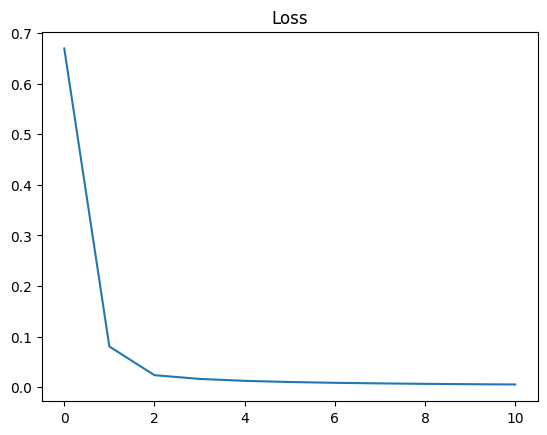

In [ ]:
# losses = []
for i in range(10):
    # Forward from input layer to hidden layer
    A2 = forward(W12, X)
    # Forward from hidden layer to output (final) layer
    A3  = YPRED = forward(W23, A2, is_final_layer=True)

    # Compute loss and gradient for weights between hidden & output layer
    loss3 = YPRED * (1 - YPRED) * (Y - YPRED)

    w23_step = lr * np.array([A2, A2]).T * loss3
    W23 = W23 + w23_step

    # Compute loss & gradient for weights between input & hidden layer
    loss2 = A2[:-1] * (1 - A2[:-1]) * np.sum(loss3 * W23[:-1], axis=1)
    W12_step = lr * np.array([X, X, X]).T * loss2
    W12 = W12 + W12_step

    # Computer loss then append
    overall_loss = sum((YPRED - Y) ** 2)
    print(f"Epoch {i+2} | Loss: ", overall_loss)
    losses.append(overall_loss)

# Visualize loss function
plt.plot(list(range(len(losses))), losses)
plt.title("Loss")
plt.show()

# Tips to improve Neural Nets


*   Expand the model (add more neurons & layers)
*   Change optimizer or learning rate
*   Use appropriate activation functions
*   Add dropout for regularization
*   Increase epochs
*   Dynamically reduce learning rate during training
*   Change batch size



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_moons

%matplotlib inline

# sns.pairplot(df, hue="Species", size= 2.5)

In [ ]:
def plot_decision_boundary(X, y, model, steps=100, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
#     steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax


# Function to visualize, accuracy & loss for training & test
def visualize_performance(n_epochs, acc, val_acc, loss, val_loss):
  %matplotlib inline
  epochs = np.arange(n_epochs)
  acc = np.array(acc)
  val_acc = np.array(val_acc)
  loss = np.array(loss)
  val_loss = np.array(val_loss)
  plt.plot(epochs, acc*100, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc*100, 'b', label='Validation accuracy')
  plt.scatter(epochs[val_acc.argmax()], val_acc.max()*100, color='green', s=70)
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.scatter(epochs[val_loss.argmin()], val_loss.min(), color='green', s=70)
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

# Classification on Half-moon dataset

In [ ]:
X, y = make_moons(n_samples=100,noise=0.1)

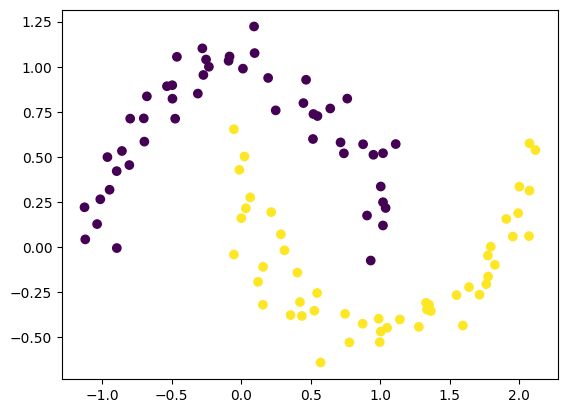

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Simple model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

In [ ]:
model.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 152ms/step - loss: 0.9676 - accuracy: 0.2000 - val_loss: 1.0484 - val_accuracy: 0.1500
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.9658 - accuracy: 0.2000 - val_loss: 1.0464 - val_accuracy: 0.1500
Epoch 3/100
3/3 [==============================] - 0s 41ms/step - loss: 0.9639 - accuracy: 0.2000 - val_loss: 1.0444 - val_accuracy: 0.1500
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.9622 - accuracy: 0.2125 - val_loss: 1.0423 - val_accuracy: 0.1500
Epoch 5/100
3/3 [==============================] - 0s 37ms/step - loss: 0.9604 - accuracy: 0.2125 - val_loss: 1.0403 - val_accuracy: 0.1500
Epoch 6/100
3/3 [==============================] - 0s 35ms/step - loss: 0.9587 - accuracy: 0.2125 - val_loss: 1.0381 - val_accuracy: 0.1500
Epoch 7/100
3/3 [==============================] - 0s 33ms/step - loss: 0.9569 - accuracy: 0.2125 - val_loss: 1.0361 - val_accuracy: 0.1500
Epoch 8/100
3/3 [==

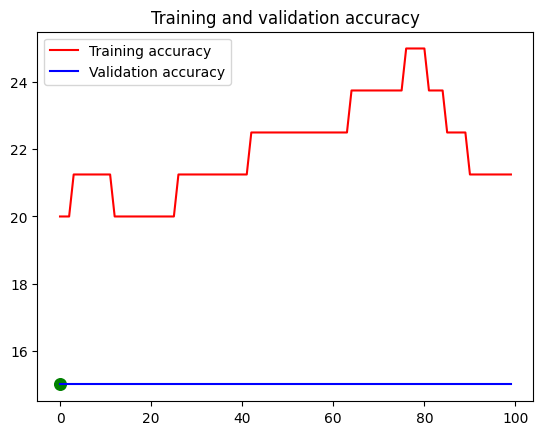

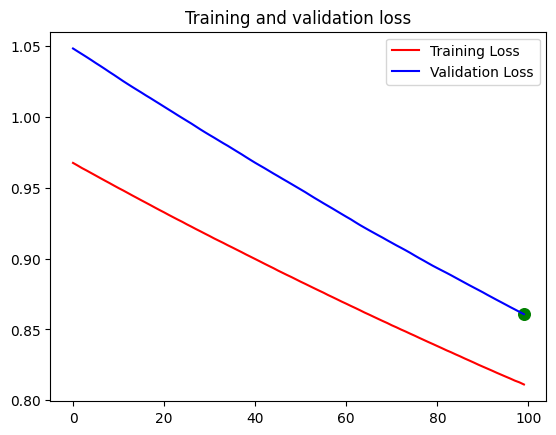

In [ ]:
visualize_performance(100, history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"])

3/3 [==============================] - 0s 5ms/step


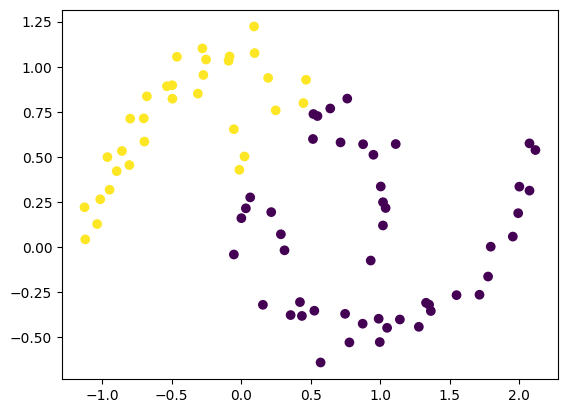

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=model.predict(X_train)>=0.5)

3/3 [==============================] - 0s 4ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

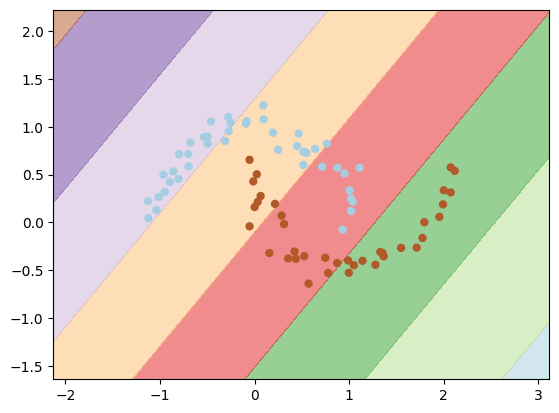

In [ ]:
plot_decision_boundary(X_train,y_train,model)

# Tip: Add more layers

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=3, activation="relu"),
    tf.keras.layers.Dense(units=4, activation="relu"),
    tf.keras.layers.Dense(units=3, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])
model.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="adam")
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 3)                 9         
                                                                 
 dense_96 (Dense)            (None, 4)                 16        
                                                                 
 dense_97 (Dense)            (None, 3)                 15        
                                                                 
 dense_98 (Dense)            (None, 1)                 4         
                                                                 
Total params: 44 (176.00 Byte)
Trainable params: 44 (176.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 113ms/step - loss: 0.7241 - accuracy: 0.2875 - val_loss: 0.7122 - val_accuracy: 0.1500
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7221 - accuracy: 0.2750 - val_loss: 0.7111 - val_accuracy: 0.1500
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7202 - accuracy: 0.2625 - val_loss: 0.7099 - val_accuracy: 0.1500
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.7185 - accuracy: 0.2500 - val_loss: 0.7087 - val_accuracy: 0.1500
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.7166 - accuracy: 0.2625 - val_loss: 0.7075 - val_accuracy: 0.1500
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.7148 - accuracy: 0.2625 - val_loss: 0.7062 - val_accuracy: 0.1500
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7131 - accuracy: 0.2500 - val_loss: 0.7051 - val_accuracy: 0.1500
Epoch 8/100
3/3 [==

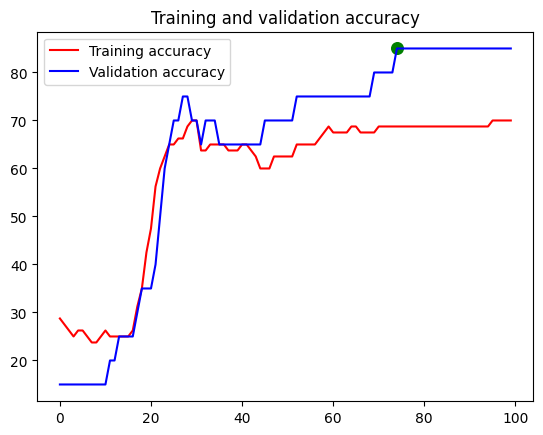

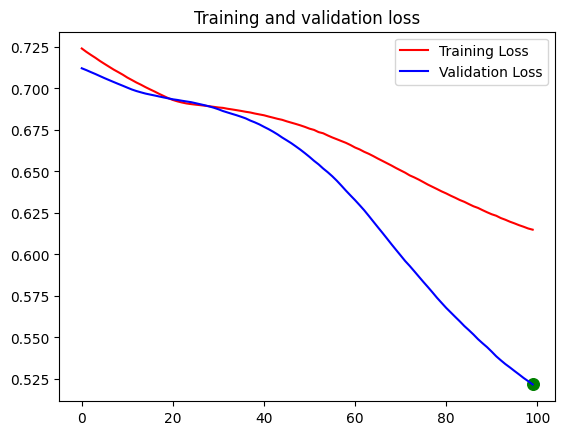

In [ ]:
visualize_performance(100, history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"])

3/3 [==============================] - 0s 4ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

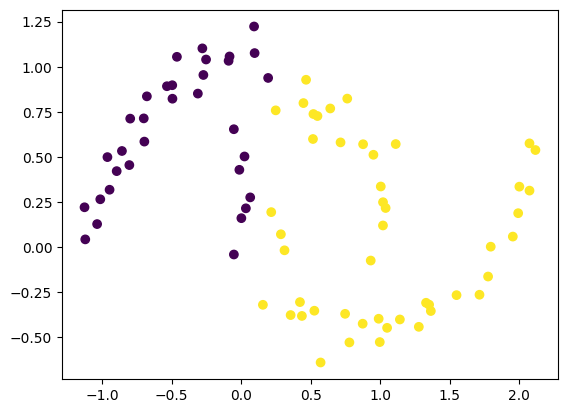

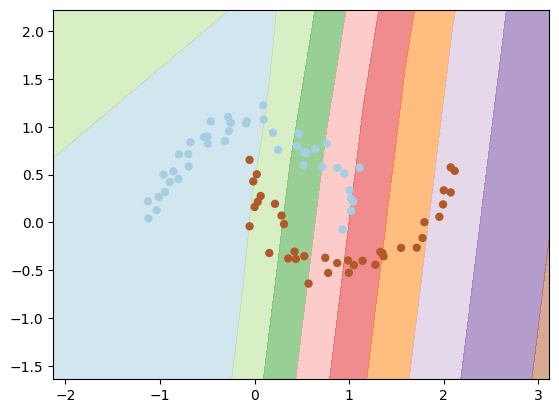

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=model.predict(X_train)>=0.5)
plot_decision_boundary(X_train,y_train,model)

# Tip: Add more neurons

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])
model.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="adam")
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 32)                96        
                                                                 
 dense_100 (Dense)           (None, 64)                2112      
                                                                 
 dense_101 (Dense)           (None, 128)               8320      
                                                                 
 dense_102 (Dense)           (None, 1)                 129       
                                                                 
Total params: 10657 (41.63 KB)
Trainable params: 10657 (41.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
3/3 [==============================] - 2s 170ms/step - loss: 0.6743 - accuracy: 0.8125 - val_loss: 0.6395 - val_accuracy: 0.8500
Epoch 2/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6436 - accuracy: 0.8000 - val_loss: 0.6036 - val_accuracy: 0.8500
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6171 - accuracy: 0.7875 - val_loss: 0.5711 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.5875 - accuracy: 0.7875 - val_loss: 0.5393 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.5608 - accuracy: 0.7875 - val_loss: 0.5075 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.5302 - accuracy: 0.8000 - val_loss: 0.4750 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.5035 - accuracy: 0.8000 - val_loss: 0.4416 - val_accuracy: 0.8500
Epoch 8/100
3/3 [==

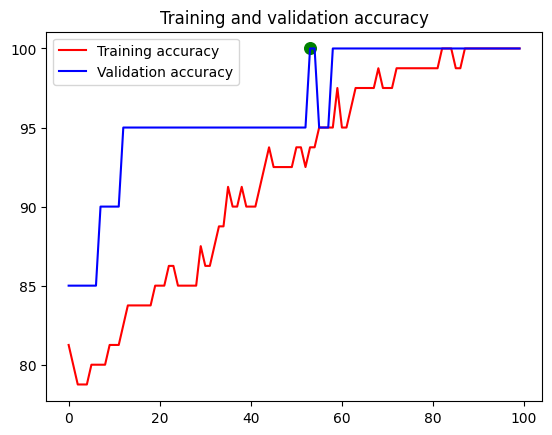

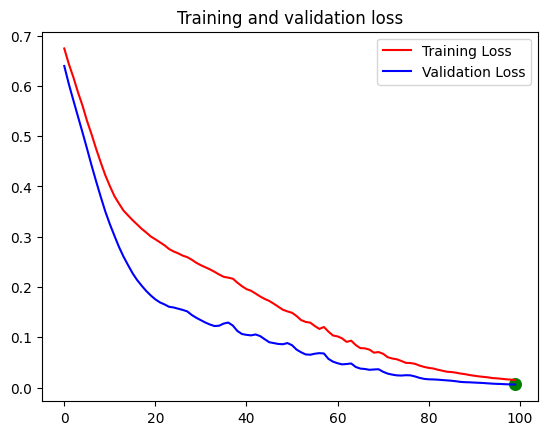

In [ ]:
visualize_performance(100, history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"])

3/3 [==============================] - 0s 4ms/step


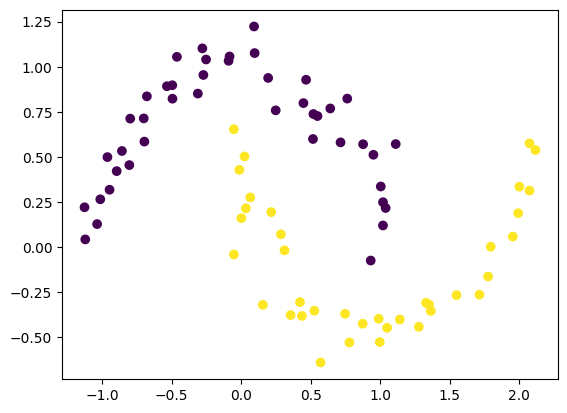

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=model.predict(X_train)>=0.5)

3/3 [==============================] - 0s 5ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

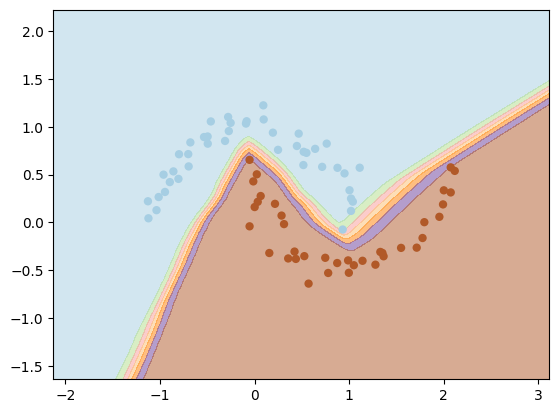

In [ ]:
plot_decision_boundary(X_train,y_train,model)

# Classification of MNIST digits (0-9)

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Animation of Forward & Back-propagation
![download (6)](https://user-images.githubusercontent.com/50156227/204368149-10d739d8-935c-402c-97af-336255ec76d9.gif)


# Large Learning Rate

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[784]),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax"),
])

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer=optim)
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 32)                25120     
                                                                 
 dense_104 (Dense)           (None, 64)                2112      
                                                                 
 dense_105 (Dense)           (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4109 - accuracy: 0.2243 - val_loss: 1.9170 - val_accuracy: 0.2379
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8657 - accuracy: 0.2727 - val_loss: 1.8005 - val_accuracy: 0.2941
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9463 - accuracy: 0.2374 - val_loss: 1.9669 - val_accuracy: 0.2070
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0396 - accuracy: 0.1938 - val_loss: 1.9677 - val_accuracy: 0.2066
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9806 - accuracy: 0.2026 - val_loss: 1.9808 - val_accuracy: 0.1994


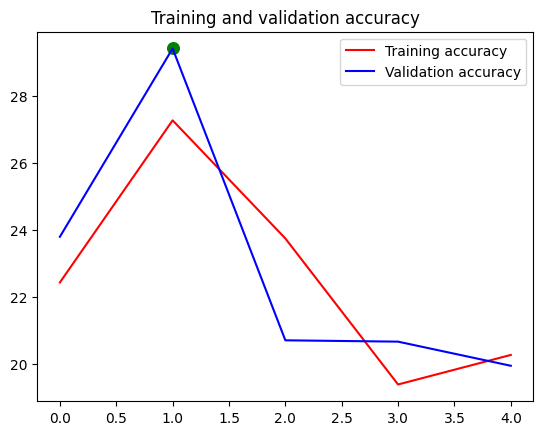

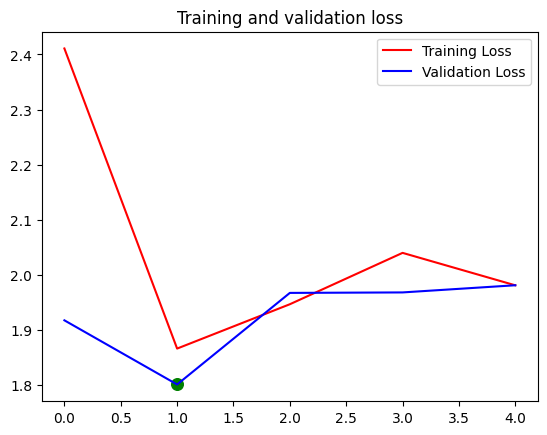

In [ ]:
visualize_performance(5, history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"])

# Tip: Appropriate Learning rate

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 32)                25120     
                                                                 
 dense_107 (Dense)           (None, 64)                2112      
                                                                 
 dense_108 (Dense)           (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5134 - accuracy: 0.6823 - val_loss: 0.5340 - val_accuracy: 0.8632
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5161 - accuracy: 0.8692 - val_loss: 0.4846 - val_accuracy: 

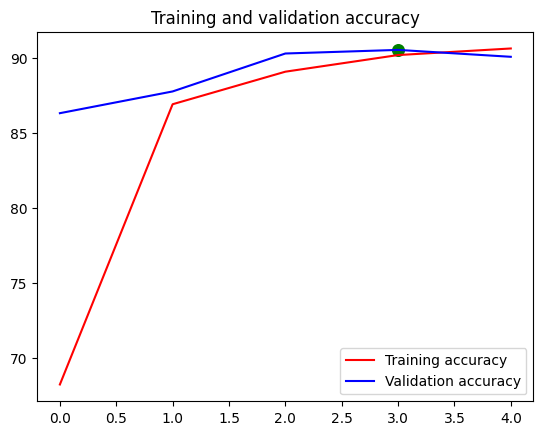

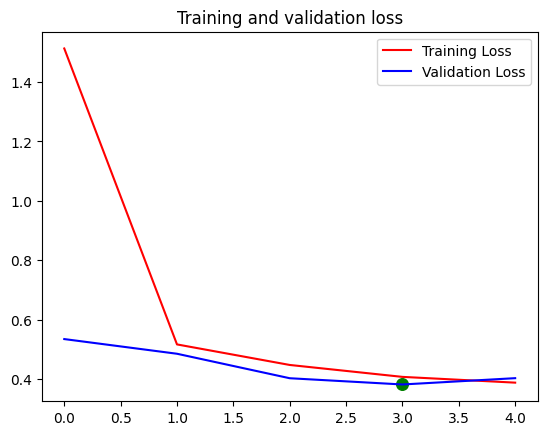

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[784]),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax"),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer=optimizer)
model.summary()
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
visualize_performance(5, history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"])

# ReLU vs LeakyReLU & Epochs++
![download (6)](https://www.researchgate.net/profile/Junxi-Feng/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU_W640.jpg)


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 32)                25120     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_110 (Dense)           (None, 64)                2112      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_111 (Dense)           (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875

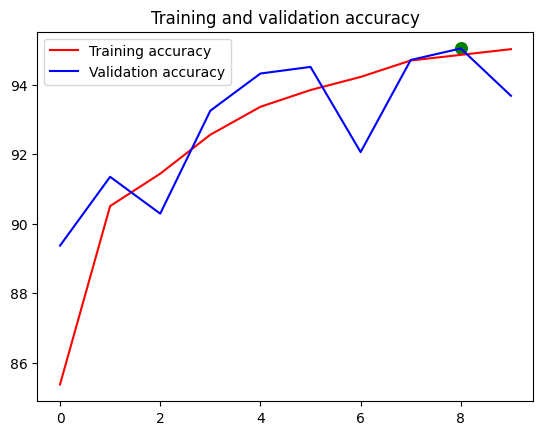

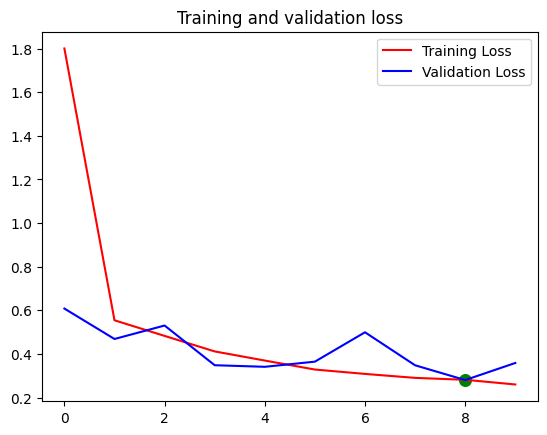

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[784]),
    tf.keras.layers.Dense(units=32), tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(units=64), tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(units=10, activation="softmax"),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer=optimizer)
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
visualize_performance(10, history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"])

# Tip: Add Dropout
![download (4)](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif)


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 32)                25120     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32)                0         
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_113 (Dense)           (None, 64)                2112      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_114 (Dense)           (None, 10)              

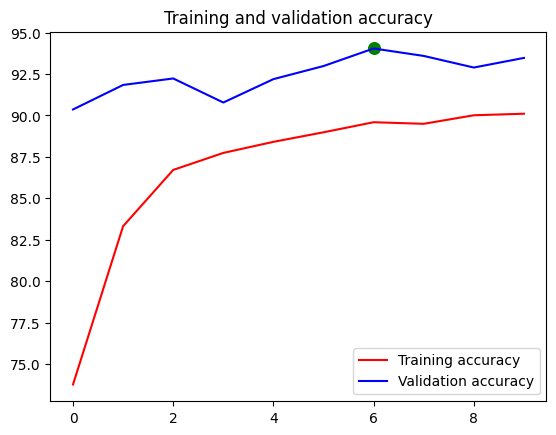

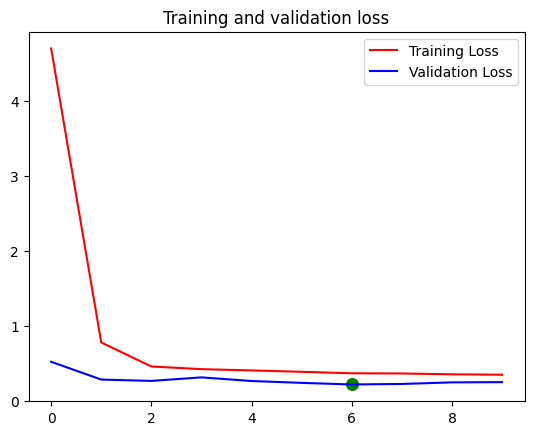

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[784]),
    tf.keras.layers.Dense(units=32), tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=64), tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=10, activation="softmax"),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer=optimizer)
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
visualize_performance(10, history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"])

# Prediction

1/1 [==============================] - 0s 91ms/step


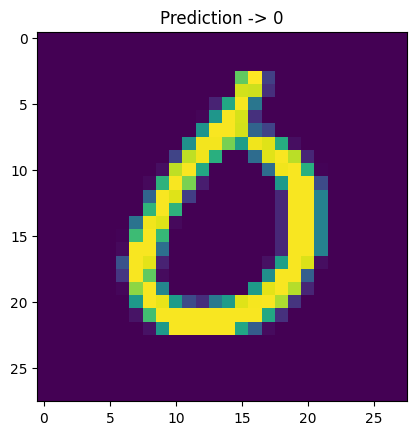

1/1 [==============================] - 0s 35ms/step


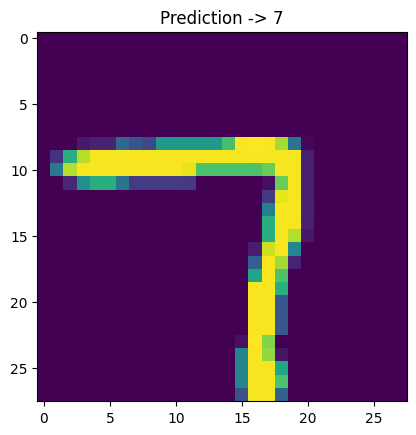

1/1 [==============================] - 0s 31ms/step


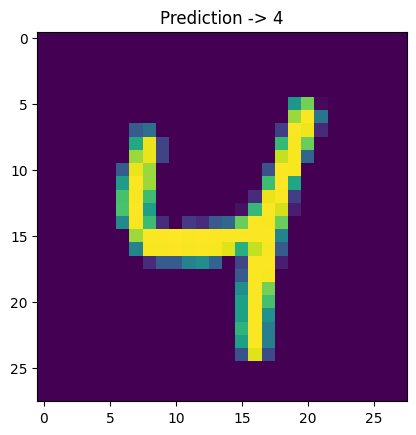

In [ ]:
# Predict single image
for index in np.random.choice(list(range(len(X_test))), 3):
  plt.imshow(X_test[index].reshape(28,28))
  ypred = model.predict(np.array([X_test[index]])).argmax()
  plt.title("Prediction -> " + str(ypred))
  plt.show()

# Conclusion:


1.   Adding complexity to models may help with underfitting
2.   on the other hand, reducing complexity may solve overfitting
3.   Choosing Learning rate is extremely important
4.   ReLU kills negative values - but LeakyReLU keeps some information
5.   Increasing epochs may improve accuracy & reduce loss
6.   Adding Dropout may reduce overfitting and keeps the loss stable

